# Lectura de archivos y gráficas de datos

El archivo BACHOCOB.MX.2017-18.csv contiene datos de cotizaciones de una acción de la Bolsa Mexicana de Valores. 

Éstas se pueden leer abriendo el archivo con `open` y recuperando cada línea con `readline`.

`open` lleva dos parámetros: el nombre del archivo a abrir (con todo y su ruta de acceso) y el _modo_ como se va a abrir. Hoy usaremos `'r'` para el modo, que significa abrir en modo lectura (_read_).

In [1]:
# Abrir el archivo
with open('bachocob.mx.2017-18.csv', 'r') as f:
    # Imprimir las primeras cinco líneas
    for i in range(5):
        print(f.readline())

Date,Open,High,Low,Close,Adj Close,Volume

2017-01-02,84.750000,84.750000,83.129997,84.750000,82.238609,165

2017-01-03,84.750000,84.750000,81.779999,83.190002,80.724838,147291

2017-01-04,83.199997,84.870003,82.360001,84.419998,81.918388,429652

2017-01-05,84.839996,87.330002,84.260002,86.930000,84.354012,367100



`readline` lee una línea del archivo (con todo y el carácter de fin de línea, ¿se fijaron en el espaciado extra del `print`?)

El archivo es un archivo de texto y la primera línea contiene el encabezado. Son siete columnas:

- Date
- Open
- High
- Low
- Close
- Adj Close
- Volume

Vamos a separar los datos:

In [1]:
lineas = []
with open('bachocob.mx.2017-18.csv', 'r') as f:
    # Leer las primeras cinco líneas
    for i in range(5):
        li = f.readline().strip()          # Quitarle el carácter EOL
        lineas.append(li)                  # Agregarlo a la lista

Hasta aquí, tenemos una lista (`lineas`) con cada una de las líneas del archivo, incluyendo el encabezado.

Vamos a separarlo en siete listas homogéneas (cada lista contiene el mismo tipo de información), una para cada columna.

In [3]:
fecha = []
apertura = []
alto = []
bajo = []
cierre = []
cierre_aj = []
volumen = []

for li in lineas[1:]:                  # Sin encabezados
    li = li.split(',')                 # Separar por las comas
    # Desempacar
    fecha.append(li[0])
    apertura.append(float(li[1]))
    alto.append(float(li[2]))
    bajo.append(float(li[3]))
    cierre.append(float(li[4]))
    cierre_aj.append(float(li[5]))
    volumen.append(float(li[6]))
    
# Imprimir los datos
print("Fecha       Apertura      Alto      Bajo    Cierre    C. Aj.   Volumen")
for i in range(len(fecha)):
    print(f'{fecha[i]:10}'
          f'{apertura[i]:10.4f}'
          f'{alto[i]:10.4f}'
          f'{bajo[i]:10.4f}'
          f'{cierre[i]:10.4f}'
          f'{cierre_aj[i]:10.4f}'
          f'{volumen[i]:10,.0f}')

Fecha       Apertura      Alto      Bajo    Cierre    C. Aj.   Volumen
2017-01-02   84.7500   84.7500   83.1300   84.7500   82.2386       165
2017-01-03   84.7500   84.7500   81.7800   83.1900   80.7248   147,291
2017-01-04   83.2000   84.8700   82.3600   84.4200   81.9184   429,652
2017-01-05   84.8400   87.3300   84.2600   86.9300   84.3540   367,100


Hicimos siete listas homogéneas. Pudimos haber hecho una lista de listas u otra estructura de Python, como un diccionario, etc.

## Uso de `pandas`

Vamos mejor a usar una biblioteca llamada `pandas`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cotizaciones = pd.read_csv('bachocob.mx.2017-18.csv')
cotizaciones.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,84.750000,84.750000,83.129997,84.750000,82.238609,165
1,2017-01-03,84.750000,84.750000,81.779999,83.190002,80.724838,147291
2,2017-01-04,83.199997,84.870003,82.360001,84.419998,81.918388,429652
3,2017-01-05,84.839996,87.330002,84.260002,86.930000,84.354012,367100
4,2017-01-06,86.120003,87.330002,85.529999,86.309998,83.752380,110693


In [11]:
open = cotizaciones["Open"]
low = cotizaciones["Low"]
dif = open - low
dif

0      1.620003
1      2.970001
2      0.839996
3      0.579994
4      0.590004
         ...   
464    2.490006
465    2.330002
466    0.220001
467    4.470001
468    0.449997
Length: 469, dtype: float64

In [9]:
x[4]

86.120003

Más bonito y más fácil, ¿no?

La columna `Date` es tipo `str`. La vamos a convertir a tipo fecha (`datetime`).

In [5]:
cotizaciones.Date = pd.to_datetime(cotizaciones.Date)
cotizaciones.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,84.750000,84.750000,83.129997,84.750000,82.238609,165
1,2017-01-03,84.750000,84.750000,81.779999,83.190002,80.724838,147291
2,2017-01-04,83.199997,84.870003,82.360001,84.419998,81.918388,429652
3,2017-01-05,84.839996,87.330002,84.260002,86.930000,84.354012,367100
4,2017-01-06,86.120003,87.330002,85.529999,86.309998,83.752380,110693


## Graficar las cotizaciones

Las cotizaciones al cierre se pueden graficar de manera sencilla utilizando `matplotlib`.

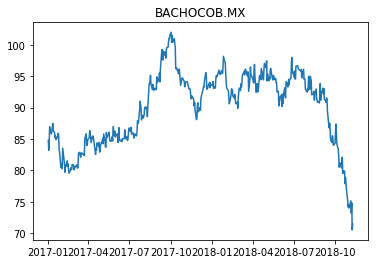

In [7]:
# Inicializar los elementos de la gráfica
fig, ax = plt.subplots()
simbolo = 'BACHOCOB.MX'
fecha = cotizaciones.Date             # Dos formas equivalentes de
cierre = cotizaciones['Close']        # referirse a las columnas
ax.plot(fecha, cierre)
ax.set(title=simbolo)
plt.show()

## Cálculo de los rendimientos logarítmicos

El manejo vectorizado de las series de `pandas` hace posible el cálculo de los rendimientos logarítmicos de manera muy sencilla.

In [8]:
rend = np.log(cierre / cierre.shift())
rend.head()

0         NaN
1   -0.018579
2    0.014677
3    0.029299
4   -0.007158
Name: Close, dtype: float64

El cálculo de los rendimientos logarítmicos se lleva a cabo de acuerdo a la fórmula:

$$R = \ln(\frac{V_f}{V_i})$$

donde $V_i$ es el valor inicial y $V_f$ es el valor final.

En la fórmula de Python, la división es la cotización al cierre del día entre la cotización al cierre del día anterior, como las columnas de cotización están ordenadas por fecha ascendente, el cierre del día anterior se encuentra en el renglón de arriba, por eso se usa `shift` para alinearlo y poder hacer la división.

El primer renglón no tiene cotización anterior, por eso el cálculo regresa `NaN` (_not a number_).

`subplots` nos permite especificar varias gráficas en la misma figura indicando el número de renglones y columnas. Regresa un objeto `Axes` para cada gráfica de la cuadrícula.

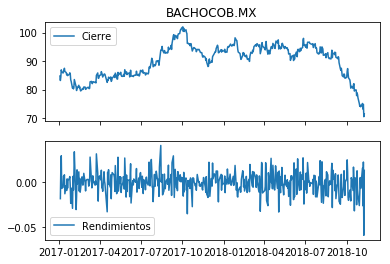

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
ax1.plot(fecha, cierre, label='Cierre')
ax1.set(title=simbolo)
ax1.legend()
ax2.plot(fecha, rend, label='Rendimientos')
ax2.legend()
plt.show()

## Calcular la volatilidad

Añadiremos ahora la gráfica de la volatilidad. Primero, calculamos la desviación estándar móvil sobre el último año (252 días).

In [10]:
volatilidad = cierre.rolling(252).std()

Utilizamos de nuevo `subplots` para apilar las tres gráficas en la misma figura.

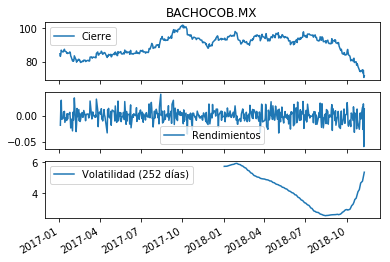

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)
ax1.plot(fecha, cierre, label='Cierre')
ax1.set(title=simbolo)
ax1.legend()
ax2.plot(fecha, rend, label='Rendimientos')
ax2.legend()
ax3.plot(fecha, volatilidad, label='Volatilidad (252 días)')
ax3.legend()
fig.autofmt_xdate()
plt.show()

## Graficar medias móviles y volumen de operación

Finalmente, se generará dos gráficas. La primera mostrará las cotizaciones al cierre junto con las medias móviles a 42 y 252 días; la segunda, el volumen de operación. Se desea que la primera gráfica ocupe una mayor proporción del área de la ventana que la segunda.

Primero se calculan las medias móviles de manera similar a como se calcularon las volatilidades más arriba.

In [12]:
media42d = cierre.rolling(42).mean()
media252d = cierre.rolling(252).mean()

Y se grafican los datos.

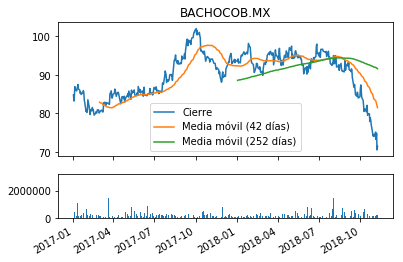

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax1.plot(fecha, cierre, label='Cierre')
ax1.plot(fecha, media42d, label='Media móvil (42 días)')
ax1.plot(fecha, media252d, label='Media móvil (252 días)')
ax1.set(title=simbolo)
ax1.legend()
ax2.bar(fecha, cotizaciones.Volume, label='Volumen')
ax.legend()
fig.autofmt_xdate()
plt.show()